![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [14]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [15]:
#check data info

schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


## Which NYC schools have the best math results?

We have 10 NYC schools with the best math results, led by **Stuyvesant High School**, which has an average math score of **754** out of the total score of 800.

In [16]:
min_score_best_math = 0.80 * 800

best_math_schools_all = schools[schools['average_math'] >= min_score_best_math]

#filter columns

best_math_schools = best_math_schools_all[['school_name', 'average_math']].sort_values(by='average_math', ascending=False)

best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


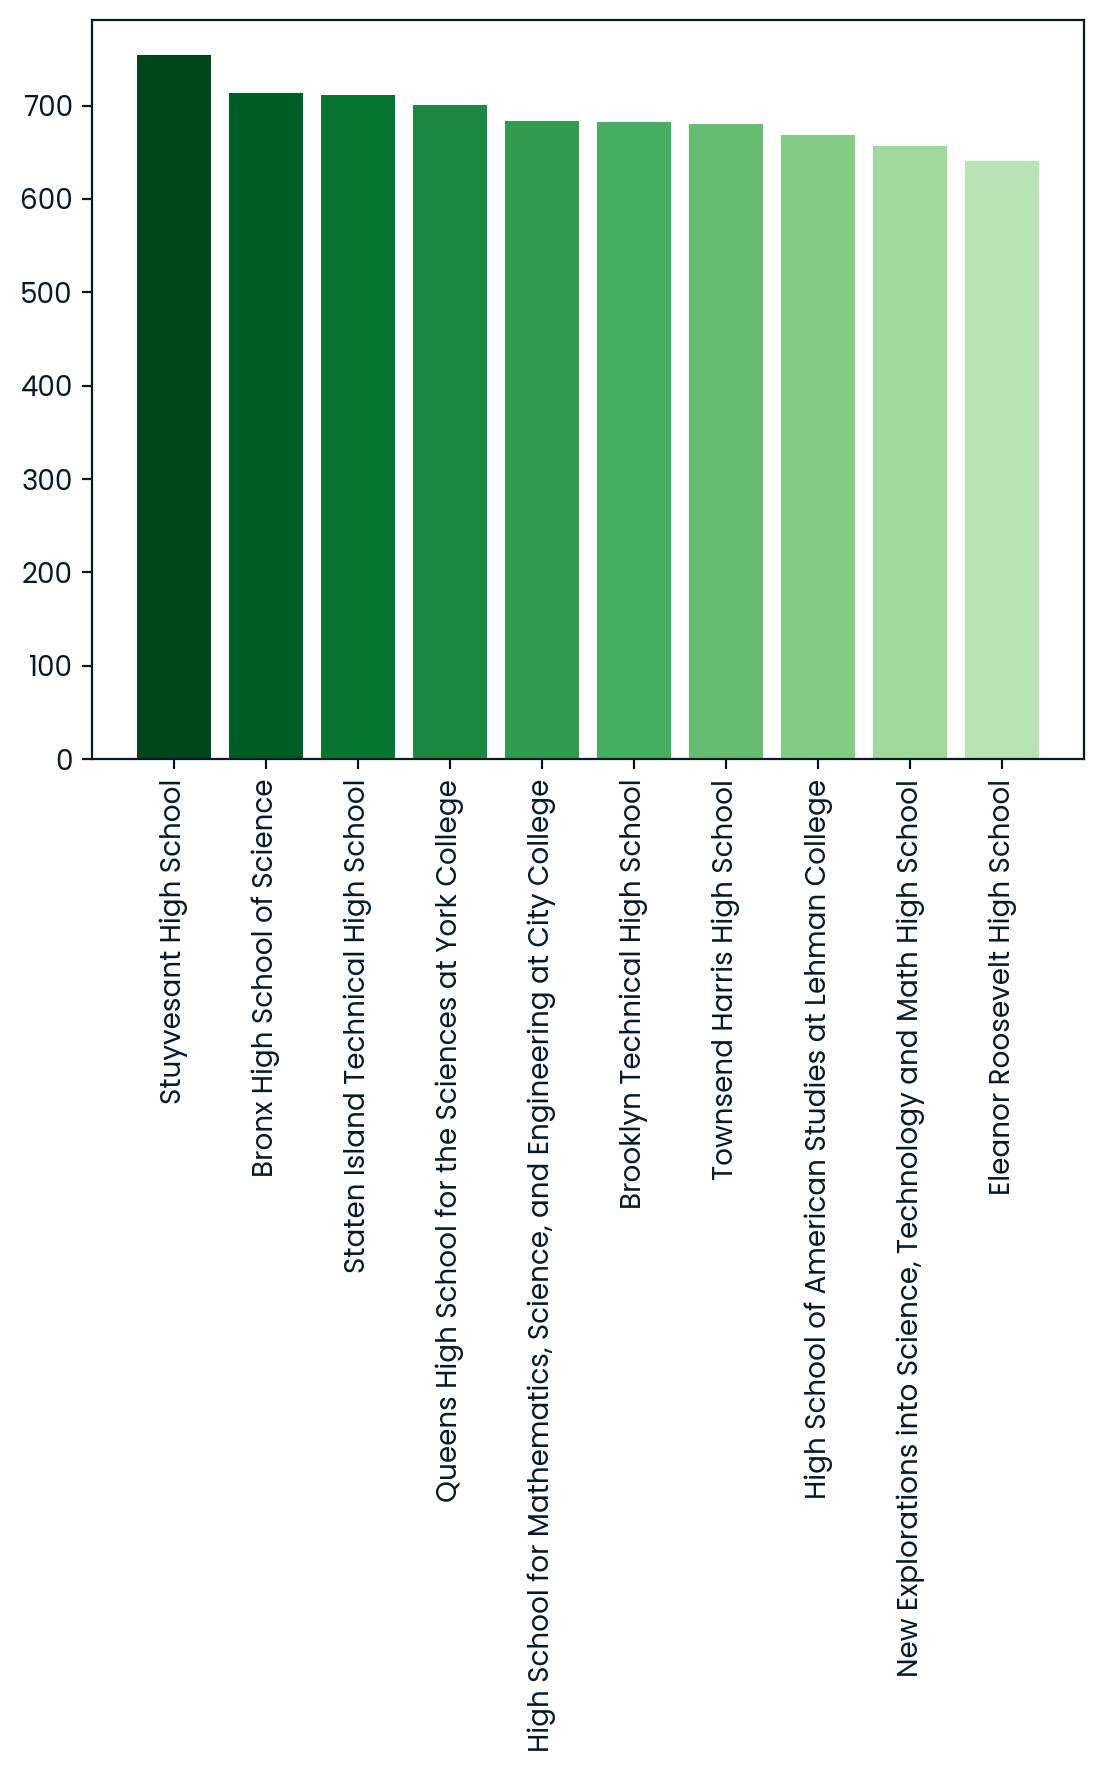

In [36]:
#plotting

import matplotlib.pyplot as plt
import numpy as np

#color

colors = plt.cm.Greens(np.linspace(1, 0.3, len(best_math_schools['average_math'])))

plt.bar(best_math_schools['school_name'], best_math_schools['average_math'], color=colors)

# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()

## What are the top 10 performing schools based on the combined SAT scores?

These are the top 10 performing schools based on the combined SAT scores, with **Stuyvesant High School** leading the list once again with a combined SAT score of 2144.

In [7]:
#Go back to the original dataframe schools

#create a new column

schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

#filter the df, include only school name and total SAT
top_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False)

#filter to top 10
top_10_schools = top_schools.head(10)

top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


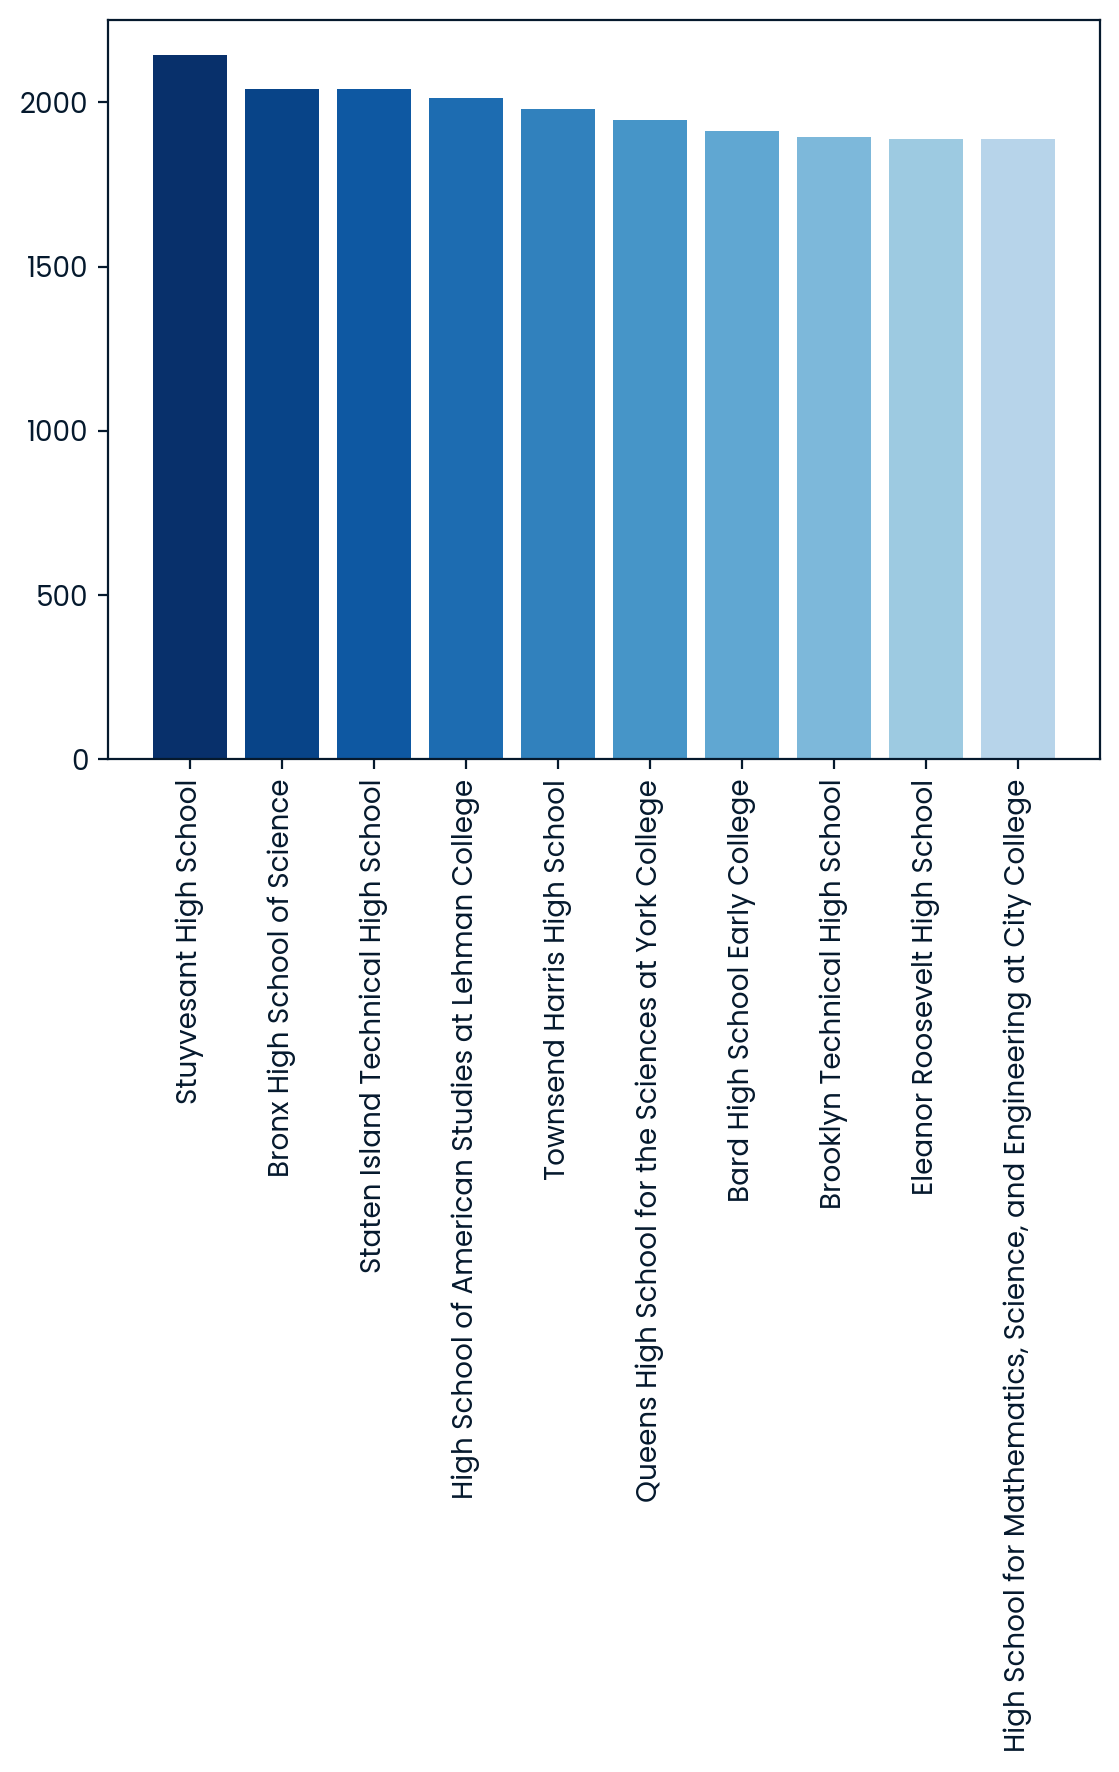

In [38]:
#plotting

#plotting

#color

colors = plt.cm.Blues(np.linspace(1, 0.3, len(top_10_schools['total_SAT'])))

plt.bar(top_10_schools['school_name'], top_10_schools['total_SAT'], color=colors)

# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()

## Which single borough has the largest standard deviation in the combined SAT score?

It's Manhattan, which has a standard dev of 230.29 across 89 schools

In [8]:
#Group by borough first

borough_group = schools.groupby('borough')

#number of schools

num_schools = borough_group['school_name'].nunique()

#rename series

num_schools = num_schools.rename('num_schools')

num_schools.sort_values(ascending=False)


borough
Brooklyn         109
Bronx             98
Manhattan         89
Queens            69
Staten Island     10
Name: num_schools, dtype: int64

In [9]:
#average SAT

average_SAT = borough_group['total_SAT'].mean().round(2)

#rename the series (bc total_SAT appears)
average_SAT = average_SAT.rename('average_SAT')
average_SAT.sort_values(ascending=False)


borough
Staten Island    1439.00
Queens           1345.48
Manhattan        1340.13
Brooklyn         1230.26
Bronx            1202.72
Name: average_SAT, dtype: float64

In [10]:
#standard dev, using ddof=1 because we're getting a sample

std_SAT = borough_group['total_SAT'].std(ddof=1).round(2)

#rename the series (bc total_SAT appears)
std_SAT = std_SAT.rename('std_SAT')
std_SAT.sort_values(ascending=False)



borough
Manhattan        230.29
Staten Island    222.30
Queens           195.25
Brooklyn         154.87
Bronx            150.39
Name: std_SAT, dtype: float64

In [11]:
#combine everything

combined = pd.concat([num_schools, std_SAT, average_SAT], axis=1)

#get the highest std_SAT

highest_std_dev = combined['std_SAT'].max()

#filter row

largest_std_dev = combined[combined['std_SAT'] == highest_std_dev]
largest_std_dev


,num_schools,std_SAT,average_SAT
borough,,,
Manhattan,89,230.29,1340.13


# SUMMARY

## Which NYC schools have the best math results?

We have 10 NYC schools with the best math results, led by **Stuyvesant High School**, which has an average math score of **754** out of the total score of 800.

## What are the top 10 performing schools based on the combined SAT scores?

These are the top 10 performing schools based on the combined SAT scores, with **Stuyvesant High School** leading the list once again with a combined SAT score of 2144.

## Which single borough has the largest standard deviation in the combined SAT score?

It's Manhattan, which has a standard dev of 230.29 across 89 schools